In [223]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import beta, norm
import numpy as np
from scipy.stats import dirichlet

### Dirichlet Distribution
Consider a bag of 100 real dice: an example of a random pmf, to sample this random pmf you put your hand in the bag and draw a die, that is, you draw a pmf. We can model the randomness of pmfs with the Dirichlet distribution. Thus, the Dirichlet distribution is a distribution of distributions.

$$f(q;\alpha) = \frac{\Gamma(\alpha_0)}{\prod_{i=1}^k\Gamma(\alpha_i)}\prod_{i=1}^kq_i^{\alpha_i-1}$$

$$Q\sim Dir(\alpha)$$

The realization of the Dirichlet distribution $q$ is a catogorical distribution over $k$ categories, a specific die in the bag. The Dirichlet distribution can be thought of as a probability distribution over a $k-1$-dimensional probability simplex. 

The Dirichlet distribution is parametrized by the concentration parameter: $\alpha = [\alpha_1,\alpha_2,...\alpha_k]$, and let $\alpha_0 = \sum_{i=1}^k\alpha_i$. The concentration parameter $\alpha$ controls the mean and variance of Dirichlet distribution.

The Dirichlet distribution is a conjugate prior for the probability parameter $q$ of the multinomial distribution. The marginal distributions of the Dirichlet distributions are Beta distributions, and Dirichlet distribution has aggregation property.

We can draw samples from Dirichlet distribution using Polya's Urn approach, stick-breaking approach or using Gamma RVs (most computationally efficient).

##### We will generate some samples from the Dirichlet distribution ($k=3$), to see the effects of the concentration parameter.

In [121]:

N = 800
alpha1 = [1,1,1]
samples1 = dirichlet(alpha).rvs(N)

alpha2 = [10,10,10]
samples2 = dirichlet(alpha2).rvs(N)

alpha3 = [2,5,25]
samples3 = dirichlet(alpha3).rvs(N)


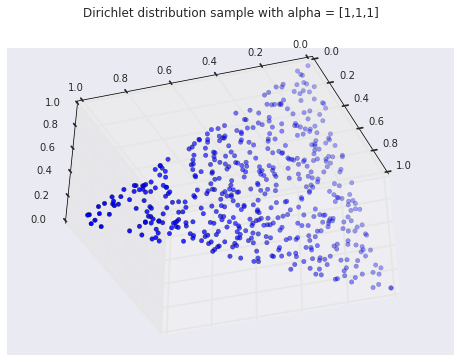

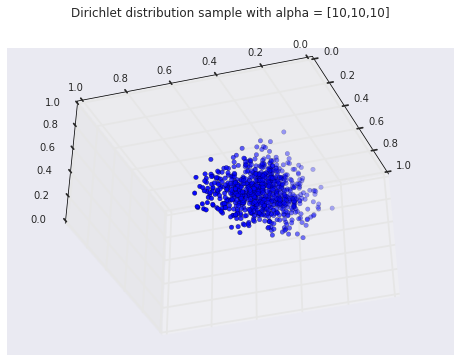

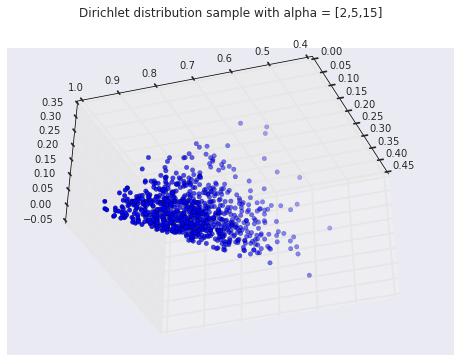

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Dirichlet distribution sample with alpha = [1,1,1]',y=1.18)
xs = samples[:,1]
ys = samples[:,2]
zs = samples[:,0]
ax.scatter(xs, ys, zs, c = 'b')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax.azim = 200
ax.elev = -45
plt.show()


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
xs = samples2[:,1]
ys = samples2[:,2]
zs = samples2[:,0]
ax1.scatter(xs, ys, zs, c = 'b')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_zlim(0,1)

ax1.azim = 200
ax1.elev = -45
plt.title('Dirichlet distribution sample with alpha = [10,10,10]',y=1.18)
plt.show()



fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
xs = samples3[:,1]
ys = samples3[:,2]
zs = samples3[:,0]
ax1.scatter(xs, ys, zs, c = 'b')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.set_zlim(0,1)

ax1.azim = 200
ax1.elev = -45
plt.title('Dirichlet distribution sample with alpha = [2,5,15]',y=1.18)
plt.show()

From the figures above, we can see the effects of the concentration parameter $\alpha$. When $\alpha = [c,c,c]$,  the density is symmetric about the uniform pmf (first two plots). When $\alpha$ is not a constant vector, the density is not symmetric (third plot).

### Dirichlet Process

Recall our example of 100 dice in a bag, in order to let the dice in the bag have infinite faces, we introduce the Dirichlet process, which enables us work with an infinite set of events, and hence to model probability distributions over infinite sample space.

The Dirichlet process $DP (\alpha, H_0)$ is parametrized by the concentration parameter $\alpha$ and the base measure $H_0$.

We can construct a sample $H$ (recall that $H$ is a probability distribution) from a Dirichlet process $\text{DP}(\alpha, H_0)$ by drawing a countably infinite number of samples/atoms $\phi_k$ from $H_0$ and setting:

$$H=\sum_{k=1}^\infty w_k \cdot\delta(x-\phi_k)$$

where $\sum_{i = 1}^{\infty} w_i = 1$. ($\delta$ is the [Dirac delta function](https://en.wikipedia.org/wiki/Dirac_delta_function).)

$H$ is a probability distribution that looks similar to $H_0$ (also a distribution). In particular, $H$ is a discrete distribution that takes the value (atom location) $\phi_k$ with probability/weight $w_k$. 


In [124]:
from __future__ import division
import pymc3 as pm
import scipy as sp
import seaborn as sns
from statsmodels.datasets import get_rdataset
from theano import tensor as T

In [125]:
np.random.seed(462233) # from random.org

In [126]:
blue = sns.color_palette()[0]

We draw and plot samples from the stick-breaking process.
$$v_1,v_2,...\sim_{iid}\text{Beta}(1,\alpha)$$ 

$$w_k = v_k\prod_{j=1}^{k-1}(1-v_k)$$

$$\phi_1,\phi_2,...\sim_{iid}H_0$$


In [245]:
def get_samples(alpha, H0):
    tol = .01
    w = []
    vs = []
    phis = []
    while sum(w) < 1.0-tol:
        previous_sum = np.sum([np.log(1-b) for b in vs])
        new_v =  beta.rvs(1, alpha)
        betas.append(new_v)
        w.append(new_v*np.exp(previous_sum))
        phis.append(H0.rvs(size=1))  
    phis = np.array(phis)
    w = np.array(w)
    w = w*norm.pdf(0)/w.max()      # rescale the weights w.r.t the peak
    return phis, w
    

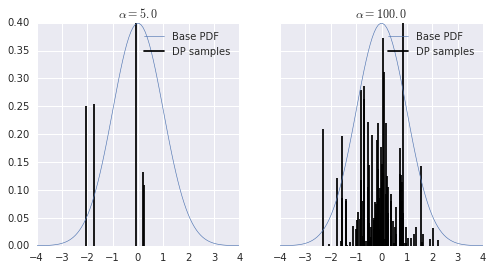

In [250]:
H0 = norm 
fig, (l_ax, r_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
alpha = 5.                                                    # concentraction parameter

phis, w = get_samples(alpha, H0)                              

l_ax.vlines(phis,[0], w,label = 'DP samples')
temp_x = np.linspace(-4,4,100)
l_ax.plot(temp_x, H0.pdf(temp_x),linewidth = 0.6,label = 'Base PDF')
l_ax.set_title(r'$\alpha = {}$'.format(alpha))
l_ax.legend()

alpha = 100.
phis, w = get_samples(alpha, H0)                              

r_ax.vlines(phis,[0], w,label = 'DP samples')
r_ax.plot(temp_x, H0.pdf(temp_x),linewidth = 0.6,label = 'Base PDF')
r_ax.set_title(r'$\alpha = {}$'.format(alpha))
r_ax.legend()


We plot samples drawn from Dirichlet process with different concentration parameter $\alpha = 5$, $\alpha = 40$, and we stop sampling when $\sum_{i = 1}^{\infty} w_i > 0.99$. The x-axis represents atom locations (samples from the standard Gaussian base measure) $\phi_k$, and the y-axis represents the probabilities/weights for different atoms (samples from the skick-breaking process) $w_k$. When $\alpha$ is smaller, the atom sizes exhibit high variance, when $\alpha$ is larger, the atom sizes become more even. When $\alpha\rightarrow \infty$, samples from the Dirichlet process converge to the base measure.

From the figures above we can see, even if the base measure is continuous, the distributions drawn from the Dirichlet process are almost surely discrete.